*************** This is the best working model so far ***********

# Muti-agent reinforcement learning for Precision Agriculture

Vertices: [(43, 24), (12, 9), (22, 0), (20, 47), (13, 34)]
Vertices from polygon object: (array('d', [43.0, 12.0, 22.0, 20.0, 13.0, 43.0]), array('d', [24.0, 9.0, 0.0, 47.0, 34.0, 24.0]))


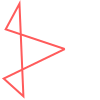

In [20]:
# Import libraries
import matplotlib.pyplot as plt
from shapely import Polygon
from shapely.geometry import Point
from scipy.spatial import ConvexHull
import numpy as np
plt.rcParams["figure.figsize"] = (5,5)
np.random.seed(33)

# Take random x,y values
x = [int(np.random.random()*100/2) for i in range(5)]
y = [int(np.random.random()*100/2) for i in range(5)]
# Make polygon using the values
vertices = list(set(zip(x,y))) # Take unique x,y combinations
Poly1 = Polygon(vertices) # The first polygon (maybe non-convex)
print("Vertices:", vertices)
print("Vertices from polygon object:", Poly1.exterior.xy)
Poly1.exterior

vertices of convex polygon: [(43, 24), (20, 47), (13, 34), (12, 9), (22, 0)]
vertices from convex polygon object: (array('d', [43.0, 20.0, 13.0, 12.0, 22.0, 43.0]), array('d', [24.0, 47.0, 34.0, 9.0, 0.0, 24.0]))


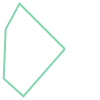

In [21]:
# Take the convex hull
hull = ConvexHull(vertices)
hull_points = [vertices[i] for i in hull.vertices]
inner_points = [point for i, point in enumerate(vertices) if i not in hull.vertices]
conv_vertices = hull_points + inner_points
Poly2 = Polygon(conv_vertices)
print('vertices of convex polygon:', conv_vertices)
print('vertices from convex polygon object:', Poly2.exterior.xy)
Poly2.exterior

Buffer vertices: (array('d', [44.505153389413756, 23.505153389413756, 23.367541098854634, 23.216523275503103, 23.05358029489221, 22.880309430750476, 22.69840919747952, 22.509662700204384, 22.315920155610172, 22.119080754907316, 21.921074046716445, 21.723841022370106, 21.529315089045483, 21.339403117241996, 21.155966748388792, 20.980804145817153, 20.81563236798678, 20.6620705367551, 10.6620705367551, 10.52364307351378, 10.399253805864424, 10.290085510707032, 10.19717623368786, 10.121409418762571, 10.063505507816336, 10.024015090217361, 10.003313667442502, 10.001598082556422, 11.001598082556422, 11.017076756107226, 11.048890004907665, 11.096775763389614, 11.160339566700372, 11.23905780015565, 18.23905780015565, 18.34029684315675, 18.4574672493014, 18.589444308859253, 18.734961184170967, 18.892621069925575, 19.06091060098741, 19.23821437907181, 19.422830478829216, 19.612986784495877, 19.806858000296998, 20.00258317132068, 20.19828354668124, 20.392080613504636, 20.582114128629325, 20.76655

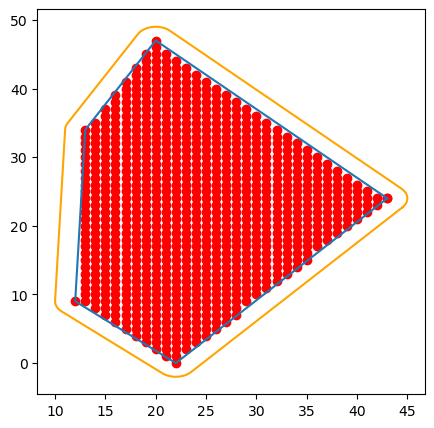

In [22]:
# Polygon exterior points
xp,yp = Poly2.exterior.xy

# Gridpoints
xs = np.arange(0, 90, 1)
ys = np.arange(0, 90, 1)

# Inside points
xps, yps = [], []
for xi in xs:
    for yi in ys:
        p = Point(xi,yi)
        if Poly2.contains(p):
            xps += [p.x]
            yps += [p.y]
xps += xp
yps += yp

plt.plot(xp,yp) # Plot the vertices
plt.scatter(xps,yps, color='r') # Plot the inside points

# Take buffer of distance 2 and plot it
buff = Poly2.buffer(distance=2)
print('Buffer vertices:', buff.exterior.xy)
x1,y1 = buff.exterior.xy
plt.plot(x1,y1, color='orange') # Plot the buffer

plt.show()

In [23]:
# Now print all points inside polygon
all_points = set(zip(xps,yps))
print("All points inside polygon:", all_points)
poly_vertices = conv_vertices # Taking all vertices of polygon
print("Polygon vertices for gymnasium test case:", poly_vertices)

All points inside polygon: {(15.0, 21.0), (26.0, 21.0), (38.0, 23.0), (18.0, 17.0), (15.0, 30.0), (26.0, 30.0), (18.0, 26.0), (26.0, 39.0), (18.0, 35.0), (27.0, 13.0), (29.0, 32.0), (19.0, 9.0), (19.0, 18.0), (21.0, 37.0), (30.0, 18.0), (41.0, 24.0), (33.0, 20.0), (33.0, 29.0), (25.0, 25.0), (25.0, 34.0), (22.0, 10.0), (22.0, 19.0), (34.0, 21.0), (14.0, 15.0), (22.0, 28.0), (34.0, 30.0), (14.0, 24.0), (37.0, 26.0), (22.0, 37.0), (14.0, 33.0), (15.0, 7.0), (26.0, 7.0), (15.0, 16.0), (26.0, 16.0), (18.0, 12.0), (15.0, 25.0), (26.0, 25.0), (18.0, 21.0), (18.0, 30.0), (27.0, 8.0), (29.0, 27.0), (19.0, 4.0), (29.0, 36.0), (30.0, 13.0), (21.0, 32.0), (21.0, 41.0), (33.0, 15.0), (25.0, 11.0), (33.0, 24.0), (25.0, 20.0), (33.0, 33.0), (25.0, 29.0), (22.0, 5.0), (25.0, 38.0), (22.0, 14.0), (34.0, 16.0), (14.0, 10.0), (22.0, 23.0), (34.0, 25.0), (14.0, 19.0), (37.0, 21.0), (22.0, 32.0), (14.0, 28.0), (15.0, 11.0), (26.0, 11.0), (18.0, 7.0), (26.0, 20.0), (17.0, 39.0), (18.0, 16.0), (29.0, 13.0),

Some helpful functions:

In [24]:
import random

# function for random starting points
def random_starting_locations(points, infected_locations):
    points = set([tuple(p) for p in points])
    st_locs = points.difference(infected_locations) # for points - infected_locations
    st_locs = random.choices(np.array(list(st_locs)),k=3)
    return st_locs

infected_locations = {(15,10), (22,13), (25,20), (26,21), (35,25)}
random_starting_locations(all_points, infected_locations)

def binary_list_to_decimal(bin_list):
    bin = ''
    for b in bin_list:
        bin += str(b)
    dec = int(bin,2)
    return dec

blist = [1,1,0,0,1]
x = binary_list_to_decimal(blist)
print(x)

25


Make the multi-agent class:

In [25]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pygame

class ThreeAgentGridworldEnv(gym.Env):
    metadata = {'render_modes': ['human', 'print', 'rgb_array'], "render_fps": 4}    
    def __init__(self, render_mode=None, grid_size=(50, 50), poly_vertices=poly_vertices):        
        super(ThreeAgentGridworldEnv, self).__init__()        
        self.Poly = Polygon(poly_vertices) # Get the points of the polygon
        self.poly_vertices = poly_vertices # Vertices of polygon
        self.size = grid_size[0]  # The size of the square grid
        self.window_size = 800  # The size of the PyGame window        
        self.grid_size = grid_size # Size of the grid (May need to remove later on)
        self.outer_boundary = self.Poly.buffer(distance=2) # outer boundary with buffer of distance 2

        # Observation points
        self.observation_points = self.obs_points()
        # print('Observation points:', self.observation_points)
        self.observation_length = len(self.observation_points)
        self.observation_map = {tuple(v):i for i,v in enumerate(self.observation_points)}
        # for p in self.observation_points:
        #     print('observation map:', p, self.observation_map[tuple(p)])

        # Keep track of visited states and count steps
        self.step_count = 0
        self.visited = set()
        self.infected_locations = {(15,10), (22,13), (25,20), (26,21), (35,25), (25, 35)}
        self.infected_length = len(self.infected_locations)
        self.infected_state_length = 2**(len(self.infected_locations)) # 2**5, binary to decimal
        self.infected_dict = {v:0 for v in self.infected_locations} # dictionary of locations
        
        # Action and observation space
        self.action_space = spaces.MultiDiscrete([5, 5, 5])  # 4 possible actions for each of the two agents
        # self.observation_positions = spaces.MultiDiscrete([self.observation_length, self.observation_length, self.observation_length])
        # self.infected_space = spaces.MultiBinary(5)
        # self.observation_space = spaces.Tuple((self.observation_positions, self.infected_space))
        self.observation_space = spaces.MultiDiscrete([self.observation_length, self.observation_length, self.observation_length, self.infected_state_length])
        
        assert render_mode is None or render_mode in self.metadata["render_modes"] # Check if the render mode is correct
        self.render_mode = render_mode
        # If human-rendering is used, `self.window` will be a reference
        # to the window that we draw to. `self.clock` will be a clock that is used
        # to ensure that the environment is rendered at the correct framerate in
        # human-mode. They will remain `None` until human-mode is used for the
        # first time.
        self.window = None
        self.clock = None

        # Reset the environment and start
        self.reset()

    def obs_points(self):
        xp,yp = self.Poly.exterior.xy
        # Gridpoints
        xs = np.arange(0, 90, 1)
        ys = np.arange(0, 90, 1)
        # Inside points
        # print(xs,ys)
        xps, yps = [], []
        for xi in xs:
            for yi in ys:
                p = Point(xi,yi)
                if self.Poly.contains(p):
                    xps += [p.x]
                    yps += [p.y]
        xps += xp
        yps += yp
        # plt.plot(xp,yp)
        # plt.scatter(xps,yps, color='r')
        obs_points = np.array(list(set(zip(xps,yps)))) # Taking unique observation points
        return obs_points
    
    def _get_obs(self):
        a1, a2, a3 = self.agent_positions[0], self.agent_positions[1], self.agent_positions[2]
        info = {'agent1': a1, 'agent2': a2, 'agent3': a3, 'step_count': self.step_count}
        # print('agent positions:', a1, a2, a3)
        p1,p2,p3 = self.observation_map[tuple(a1)], self.observation_map[tuple(a2)], self.observation_map[tuple(a3)]
        infected = binary_list_to_decimal(list(self.infected_dict.values()))
        state = np.array([p1,p2,p3,infected]) # convert the infected binary list to decimal
        return state, info

    def reset(self, seed=None, options={}):
        self.visited = set()
        self.step_count = 0
        self.infected_locations = {(15,10), (22,13), (25,20), (26,21), (35,25), (25, 35)}
        self.infected_dict = {v:0 for v in self.infected_locations} # dictionary of locations
        self.agent_positions = [
            np.array([14, 34]),  # Agent 1 
            # np.array([self.grid_size[0]-1, self.grid_size[1]-1]),  # Agent 2 starts at bottom-right corner,
            # np.array([self.grid_size[0]-3, self.grid_size[1]-3])  # Agent 3 starts at specific position,
            np.array([80/2, 50/2]),  # Agent 2 
            np.array([40/2, 80/2]),  # Agent 3
        ]
        # self.agent_positions = random_starting_locations(self.observation_points, self.infected_locations)
        return self._get_obs()

    def step(self, action):
        # Placeholder for terminal state and rewards
        terminated, truncated = False, False
        rewards = 0
        self.step_count += 1

        # Define the movements corresponding to each action
        movements = [(-1, 0), (1, 0), (0, -1), (0, 1), (0, 0)]  # up, down, left, right, none
        
        # Update the positions of both agents
        for i, act in enumerate(action):
            # if act == 4: # If the action is none
            #     terminated = True # Terminated
            #     break

            movement = movements[act] # What movement to take
            new_position = self.agent_positions[i] + movement # New position after movement
            
            # Ensure the new position is within bounds
            # new_position = np.clip(new_position, [0, 0], [self.grid_size[0]-1, self.grid_size[1]-1])
            new_p = Point(new_position[0], new_position[1])
            # print("checking new position", tuple(new_position))
            if self.Poly.contains(new_p):
                self.agent_positions[i] = new_position
            else:
                rewards -= 10
            if tuple(new_position) in self.visited:
                rewards -= 10
            else:
                rewards -= 1
            self.visited.add(tuple(new_position))
        
        # Check if an infected location is visited
        infected_visited = [x for x in self.agent_positions if tuple(x) in self.infected_locations] # If infected cells are visited
        for v in infected_visited:
            if tuple(v) in self.infected_locations:
                self.infected_locations.remove(tuple(v))
                self.infected_dict[tuple(v)] = 1
        
        if infected_visited:
            rewards += 100 * len(infected_visited) 

        if sum(list(self.infected_dict.values()))==self.infected_length:
            rewards += 100000
            terminated = True

        
        # If the agents meet at the same position, we can assign a reward or consider it a terminal state
        if np.array_equal(self.agent_positions[0], self.agent_positions[1]) or np.array_equal(self.agent_positions[0], self.agent_positions[2]) or np.array_equal(self.agent_positions[1], self.agent_positions[2]):
            rewards -= 100000  # Infinity reward for meeting at the same position
            terminated = True
        
        obs, info = self._get_obs()
        # rewards = rewards * self.gamma ** self.step_count
        return obs, rewards, terminated, truncated, info

    def render(self):
        if self.render_mode == 'print':
            grid = np.zeros(self.grid_size)
            grid[tuple(self.agent_positions[0])] = 1  # Mark the position of the first agent
            grid[tuple(self.agent_positions[1])] = 2  # Mark the position of the second agent
            print(grid)
        else:
            if self.window is None and self.render_mode == "human": # Initialize pygame if it is not initialized
                pygame.init()
                pygame.display.init()
                self.window = pygame.display.set_mode(
                    (self.window_size, self.window_size)
                )
            if self.clock is None and self.render_mode == "human":
                self.clock = pygame.time.Clock()
            
            # Fill the canvas
            canvas = pygame.Surface((self.window_size, self.window_size))
            canvas.fill((255, 255, 255))
            pix_square_size = (
                self.window_size / self.size
            )  # The size of a single grid square in pixels

            # Draw the polygon
            pixel_poly_vertices = [(point[0] * pix_square_size, point[1] * pix_square_size) for point in self.poly_vertices]
            pygame.draw.polygon(surface=canvas, 
                                color=(255, 255, 0), 
                                points=pixel_poly_vertices)
            
            # Draw the visited regions
            for p in self.visited:
                pygame.draw.rect(
                canvas,
                pygame.Color(100, 100, 100, a=0.5),
                pygame.Rect(
                    pix_square_size * np.array(p),
                    (pix_square_size, pix_square_size),
                ),
                )
            # Draw agent1 (square)
            pygame.draw.rect(
                canvas,
                (255, 0, 0),
                pygame.Rect(
                    pix_square_size * self.agent_positions[0],
                    (pix_square_size, pix_square_size),
                ),
            )
            # Draw agent2 (circle)
            pygame.draw.circle(
                canvas,
                (0, 0, 255),
                (self.agent_positions[1] + 0.5) * pix_square_size,
                pix_square_size / 3,
            )
            # Draw agent3 (circle)
            pygame.draw.circle(
                canvas,
                (0, 255, 0),
                (self.agent_positions[2] + 0.5) * pix_square_size,
                pix_square_size / 3,
            )
            # Draw infected locations
            for l in self.infected_locations:
                pygame.draw.rect(
                    canvas,
                    (0, 255, 255),
                    pygame.Rect(
                        pix_square_size * np.array(l),
                        (pix_square_size, pix_square_size),
                    ),
                )


            if self.render_mode == "human":
                # The following line copies our drawings from `canvas` to the visible window
                self.window.blit(canvas, canvas.get_rect())
                pygame.event.pump()
                pygame.display.update()

                # We need to ensure that human-rendering occurs at the predefined framerate.
                # The following line will automatically add a delay to keep the framerate stable.
                self.clock.tick(self.metadata["render_fps"])
                # Finally
                pygame.event.get()

            elif self.render_mode == 'rgb_array':  # rgb_array
                return np.transpose(
                    np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2)
                )
            
    def close(self):
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()

Register, create the environment and random play:

In [26]:
# Register the environment
gym.envs.registration.register(
    id='ThreeAgentGridworld-v0',
    entry_point=ThreeAgentGridworldEnv,
    max_episode_steps=2000,
)

# Example of creating and using the environment
env = gym.make('ThreeAgentGridworld-v0',poly_vertices=poly_vertices, render_mode='human')
env.metadata['render_fps'] = 30
obs, info = env.reset()
env.render()

c:\Users\choto\miniconda3\envs\weed\Lib\site-packages\gymnasium\envs\registration.py:694: UserWarning: WARN: Overriding environment ThreeAgentGridworld-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Random play with keyboard:

In [27]:
env.reset()
terminated, truncated = False, False
total_rewards = 0
while True:
    act_str = input("Enter 3 actions by comma:")
    action = eval(act_str)
    obs, reward, terminated, truncated,  info = env.step(action)
    env.render()
    total_rewards += reward
    print(f"Obs: {obs}, Reward: {reward}, terminated: {terminated}, total_rewards: {total_rewards}, action: {action}")
    if terminated or truncated:
        print('terminated:', terminated, 'truncated:', truncated)
        break
    pygame.event.get()

SyntaxError: invalid syntax (<string>, line 0)

Just random play!

In [ ]:
# Random play
env.reset()
terminated, truncated = False, False
total_rewards = 0
while True:
    action = env.action_space.sample()
    print(action)
    obs, reward, terminated, truncated,  info = env.step(action)
    env.render()
    total_rewards += reward
    print(f"Obs: {obs}, Reward: {reward}, terminated: {terminated}, total_rewards: {total_rewards}")
    if terminated or truncated:
        print('terminated:', terminated, 'truncated:', truncated)
        break
    pygame.event.get()

[3 3 1]
Obs: [455 101 105   0], Reward: -3, terminated: False, total_rewards: -3
[3 2 2]
Obs: [455 159 436   0], Reward: -13, terminated: False, total_rewards: -16
[2 2 2]
Obs: [775 495 499   0], Reward: -3, terminated: False, total_rewards: -19
[3 3 3]
Obs: [455 159 436   0], Reward: -30, terminated: False, total_rewards: -49
[3 1 3]
Obs: [455 500 105   0], Reward: -31, terminated: False, total_rewards: -80
[3 0 3]
Obs: [455 159  45   0], Reward: -31, terminated: False, total_rewards: -111
[2 4 0]
Obs: [775 159 558   0], Reward: -21, terminated: False, total_rewards: -132
[4 0 3]
Obs: [775 694 234   0], Reward: -12, terminated: False, total_rewards: -144
[3 1 2]
Obs: [455 159 558   0], Reward: -30, terminated: False, total_rewards: -174
[1 0 4]
Obs: [786 694 558   0], Reward: -21, terminated: False, total_rewards: -195
[0 3 2]
Obs: [455 621 627   0], Reward: -12, terminated: False, total_rewards: -207
[4 4 3]
Obs: [455 621 558   0], Reward: -30, terminated: False, total_rewards: -237


In [ ]:
# Close the environment
env.close()
# Set a breakpoint, will give an error
assert False, "breakpoint"

AssertionError: breakpoint

# Training cells!

Advantage actor-critic:

In [ ]:
# keep track of running time
import time
start = time.time()

# Advantage Actor Critic
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

vec_env = make_vec_env('ThreeAgentGridworld-v0', n_envs=4)

model = A2C("MlpPolicy", vec_env, verbose=1, tensorboard_log="./a2c_log_w2", gamma=0.99)
model.learn(total_timesteps=1000000)
model.save("multi_agent_a2c_w2")
del model, A2C, make_vec_env
end = time.time()
duration = end-start
print("Time taken for training:", duration)

Using cuda device
Logging to ./a2c_log_w2\A2C_1
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 201       |
|    ep_rew_mean        | -1.05e+05 |
| time/                 |           |
|    fps                | 648       |
|    iterations         | 100       |
|    time_elapsed       | 3         |
|    total_timesteps    | 2000      |
| train/                |           |
|    entropy_loss       | -4.82     |
|    explained_variance | -0.000163 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -249      |
|    value_loss         | 6.13e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 302       |
|    ep_rew_mean        | -1.07e+05 |
| time/                 |           |
|    fps                | 691       |
|    iterations         | 200       |
|    time_elapsed       | 5         |
| 

Proximal Policy Optimization

In [ ]:
# Proximal Policy Optimization
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Training cell
vec_env = make_vec_env('ThreeAgentGridworld-v0', n_envs=4)

model = PPO("MlpPolicy", vec_env, verbose=1, tensorboard_log="./ppo_log1", gamma=0.99)
model.learn(total_timesteps=300000)
model.save("multi_agent_ppo_w1")
del model, PPO, make_vec_env

# Inference

Play using trained network and default env (we can also use vector env):

In [28]:
import pygame
import gymnasium as gym
from stable_baselines3 import A2C # For PPO, need to change this

# Load trained network
model = A2C.load("multi_agent_a2c_w2")

# Make the environment
env = gym.make('ThreeAgentGridworld-v0', render_mode='human')
env.metadata['render_fps'] = 30
obs, info = env.reset()
env.render()

In [29]:
# Start playing
terminated, truncated = False, False
total_rewards = 0
while True:
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated,  info = env.step(list(action))
    env.render()
    total_rewards += reward
    print(f"Obs: {obs}, Reward: {reward}, terminated: {terminated}, total_rewards: {total_rewards}")
    if terminated or truncated:
        print('terminated:', terminated, 'truncated:', truncated)
        break
    pygame.event.get()

Obs: [ 29 694 134   0], Reward: -3, terminated: False, total_rewards: -3
Obs: [ 90 680 198   0], Reward: -3, terminated: False, total_rewards: -6
Obs: [419 344 270   0], Reward: -3, terminated: False, total_rewards: -9
Obs: [483 613 592   0], Reward: -3, terminated: False, total_rewards: -12
Obs: [812 280 664   2], Reward: 97, terminated: False, total_rewards: 85
Obs: [ 62  58 162   2], Reward: -3, terminated: False, total_rewards: 82
Obs: [380 800 231   2], Reward: -3, terminated: False, total_rewards: 79
Obs: [452 240 305   2], Reward: -3, terminated: False, total_rewards: 76
Obs: [513 737 624   2], Reward: -3, terminated: False, total_rewards: 73
Obs: [ 26 404 699   2], Reward: -3, terminated: False, total_rewards: 70
Obs: [ 89 158 195   2], Reward: -3, terminated: False, total_rewards: 67
Obs: [416  94 267   2], Reward: -3, terminated: False, total_rewards: 64
Obs: [481 361 590   2], Reward: -3, terminated: False, total_rewards: 61
Obs: [809  36 661   2], Reward: -3, terminated: Fa

Playing using trained network and default env:

In [30]:
env.close()

In [ ]:
# # Play using vec envs (not needed)
# vec_env = make_vec_env('ThreeAgentGridworld-v0', n_envs=1)
# obs = vec_env.reset()
# while True:
#     action, _states = model.predict(obs)
#     obs, rewards, dones, info = vec_env.step(action)
#     print(f"Obs: {obs}, Reward: {rewards}, dones: {dones}, info: {info}")
#     if dones.any():
#         print('dones:', dones)
#         print('rewards:', rewards)
#         break
#     vec_env.render("human")